In [59]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [60]:
# Hyperparameters
learning_rate = 0.01
batch_size = 100
num_epochs = 1

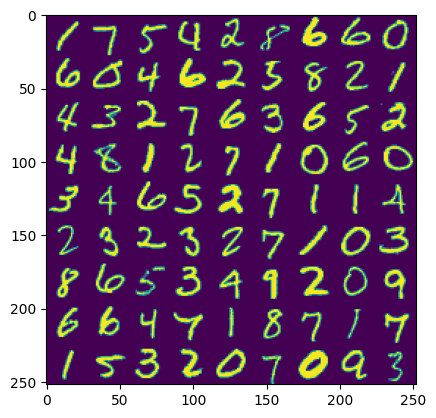

In [61]:
# Load MNIST
dataset_train = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)

dataset_test = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=True)

img, label = next(iter(test_loader))

N = 9
grid = [img[x*N:N*x+N].numpy().reshape(N * 28, 28) for x in range(N)]

plt.imshow(np.concatenate(grid, axis=1))

In [62]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.l1 = nn.Linear(784, 50)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        return self.l2(x)

model = MNIST_Net().to(device)

loss = 0.22818 accuracy 0.95: 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]


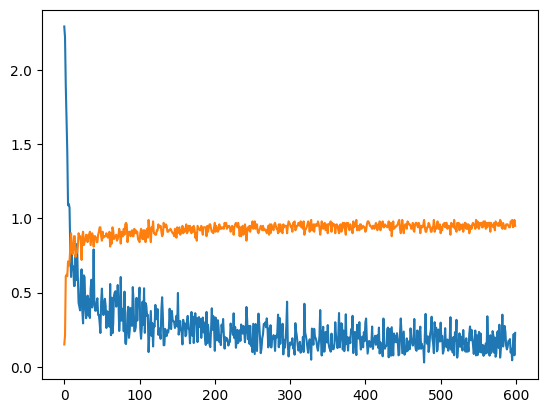

In [63]:
def train():
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses, accuracies = [], []

    for epoch in (t := trange(num_epochs)):
        for images, labels in train_loader:
            optimizer.zero_grad()

            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # forward backward 
            out = model(images)
            l = loss(out, labels)
            accuracy = (torch.argmax(out, dim=1) == labels).float().mean()
            accuracies.append(accuracy.cpu().item())

            l.backward()
            optimizer.step()


            losses.append(l.item())
            t.set_description(f"loss = {l.item():.5f} accuracy {accuracy:.2f}")


    plt.plot(losses)
    plt.plot(accuracies)

train()

In [64]:
# evaluation 
with torch.no_grad():
    acc = []
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        out = model(images)
        acc.append((torch.argmax(out, dim=1) == labels).cpu().float().mean().item())
    print(f"accuracy: {sum(acc) / len(acc)}")

accuracy: 0.9543000012636185
